![](task/1.png)

In [54]:
from sympy import *
import numpy as np
from numba import njit, prange
from collections import defaultdict
import matplotlib.pyplot as plt

# 1.1.8, 1.5.2, 1.7, 1.6, 1.9.2

In [55]:
def calculateNum(n: int):
    return 32 / (n ** 2 + 9 * n + 20)


def calculateSum(N: int):
    sum = 0
    for n in prange(N):
        sum += calculateNum(n)
    return sum

In [65]:
N_list = [10 ** k for k in range(1, 6)]
# N_list = [100]

sums = {}
errors = {}
digits = defaultdict(int)
exact_sum = 8

for N in N_list:
    sums[N] = calculateSum(N)
    errors[N] = abs(sums[N] - exact_sum)

for N in N_list:
    i = -1
    for i in range(-1, 50):
        order_of_error = 1 / (10 ** i)
        if errors[N] <= order_of_error:
            digits[N] += 1
        else:
            break

for N in N_list:
    print(f"{sums[N]}\t±\t{errors[N]} \twith {digits[N]} значащих цифр")

5.714285714285714	±	2.2857142857142856 	with 1 значащих цифр
7.69230769230769	±	0.30769230769231015 	with 2 значащих цифр
7.968127490039844	±	0.03187250996015578 	with 3 значащих цифр
7.9968012794882295	±	0.003198720511770503 	with 4 значащих цифр
7.999680012799457	±	0.00031998720054282614 	with 5 значащих цифр


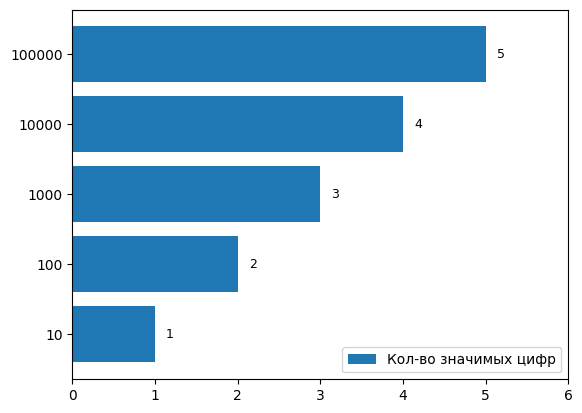

In [66]:
keys_list = list(map(str, sums.keys()))
errors_list = list(errors.values())
digits_list = list(digits.values())

bars = plt.barh(keys_list, errors_list, label='Погрешность')
plt.bar_label(bars, padding=8, fontsize=9)
plt.xlim(0, 14)
plt.legend()
# plt.savefig('plots/series_error.png', dpi=300)
plt.close()

bars = plt.barh(keys_list, digits_list, label='Кол-во значимых цифр')
plt.bar_label(bars, padding=8, fontsize=9)
plt.xlim(0, 6)
plt.legend()
# plt.savefig('plots/series_digits_list.png', dpi=300)